# Data Mining Versuch Verkehrsschilderkennung mit Neuronalen Netzen

* Autor: Prof. Dr. Johannes Maucher
* Datum: 01.06.2021

## Abgabe:

- **Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen und den entsprechenden Ausgaben.**
- **Das Notebook ist als .ipynb und als .html abzugeben.**
- **Klausurelevante Fragen sind Dokument "Fragenkatalog Datamining" zu finden.**
- Antworten auf Fragen im Notebook, Diskussionen und Beschreibung der Ergebnisse sind optional (aber empfohlen) und werden nicht bewertet.

* [Übersicht Data Mining Praktikum](https://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)


# Einführung

In diesem Versuch soll ein Convolutional Neural Network (CNN) für die Erkennung von Verkehrschildern implementiert, trainiert, evaluiert und getestet werden. Als Eingabe erhält das neuronale Netz Bilder von deutschen Verkehrsschildern. Ausgabe ist der Typ des Verkehrsschilds. Für Training und Test sind die Verkehrsschildbilder schon in separate Verzeichnissen abgelegt. Neben den Bildern selbst, enthält das zu diesem Versuch gehörende Datenverzeichnis auch Dateien mit Metadaten, die z.B. Bildeigenschaften, Verkehrsschildbedeutungen und die zugehörigen Klassenlabel beschreiben. Die Daten können Sie von hier herunterladen: https://cloud.mi.hdm-stuttgart.de/s/eQbA7wQttqqKLHW

## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Convolutional Neural Networks (CNNs)
* Implementierung Tiefer Neuronaler Netze mit Tensorflow und Keras: 
    - Definition der Netzarchitektur
    - Training
    - Evaluation und Test
    
* Einfache Methoden der Bildverarbeitung:
    - Augmentierung
    - Kontrastverstärkung

* Evaluation eines Klassifikators


## Vorbereitung

### Grundlagen Neuronale Netze

Machen Sie sich mit den [Grundlagen herkömmlicher Neuronaler Netze (KI Vorlesung)](https://lectures.mi.hdm-stuttgart.de/mi7ai/06NeuralNets.html) und den [Grundlagen Convolutional Neural Networks ((KI Vorlesung))](https://lectures.mi.hdm-stuttgart.de/mi7ai/06ConvolutionNeuralNetworks.html) vertraut (**user**: *mi7ai*, **pw**: *ailecture*).


### Implementierung Neuronaler Netze mit Tensorflow und Keras

Machen Sie sich mit der Implementierung von Neuronalen Netzen mit Tensorflow und Keras vertraut. Z.B. mit den [Tensorflow Quickstart Tutorials](https://www.tensorflow.org/tutorials/quickstart/beginner)

# Durchführung

## Vorbereitende Untersuchungen
1. Importieren Sie ein Bild aus dem Verzeichnis `Train` mit der [scikit-image.io](https://scikit-image.org/docs/stable/api/skimage.io.html)-Methode `imread()` und zeigen Sie dieses mit der Methode `imshow()` an. Geben Sie die Größe des Bildes aus (Attribut `.shape`). 
2. Verändern Sie die Größe des Bildes mit der [scikit-image.transform](https://scikit-image.org/docs/stable/api/skimage.transform.html)-Methode `resize()` auf eine Größe von $32x32x3$. Die Verzerrung des Seitenverhältnisses kann dabei ignoriert werden. Diese Methode führt auch eine Normalisierung der Pixelwerte von [0,255] auf [0,1] durch.
3. Führen Sie mit der [scikit-image.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html)-Methode `equalize_adapthist()` eine Kontrastverstärkung des Bildes durch. Zeigen Sie das vergrößerte und kontrastangereicherte Bild an. **Anmerkung:** Das kontrastverstärkte Bild sieht zwar unschöner aus, auf der Basis kontrastverstärkter Bilder läßt sich aber im allgemeinen die Objekterkennung verbessern.
2. Importieren Sie die Datei `Train.csv` und machen Sie sich mit deren Inhalt vertraut. Die Datei `Test.csv` ist gleich strukturiert, bezieht sich aber auf die Bilder im Verzeichnis `Test`. Wieviele Zeilen enthalten die Dateien?
3. Importieren Sie die Datei `signnames.csv` und machen Sie sich mit deren Inhalt vertraut. 

In [1]:
from skimage import io, transform, exposure

(30, 29, 3)

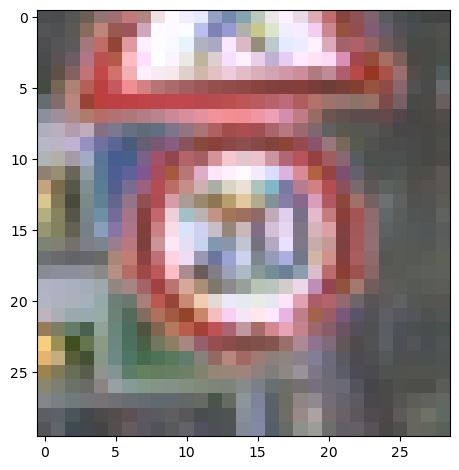

In [2]:
# 1.
image = io.imread("./traffic-sign-recognition/data/Train/0/00000_00000_00000.png")
io.imshow(image)
image.shape

In [3]:
# 2.
resized_image = transform.resize(image, (32, 32, 3))
#io.imshow(resized_image)
#resized_image.shape

(32, 32, 3)

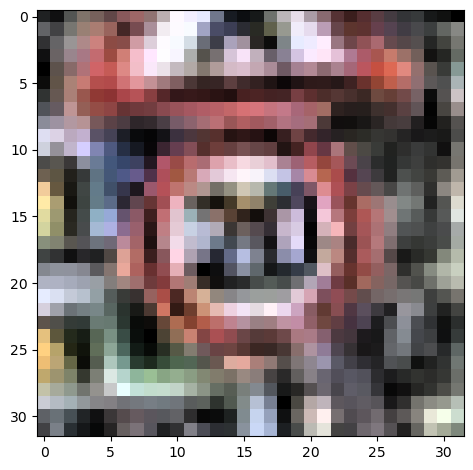

In [4]:
# 3.
contrast_enhanced_image = exposure.equalize_adapthist(resized_image)
io.imshow(contrast_enhanced_image)
contrast_enhanced_image.shape

In [5]:
import pandas as pd

In [6]:
# 4.
train_csv_path = "./traffic-sign-recognition/data/Train.csv"
trainDF = pd.read_csv(train_csv_path)
print("Train.csv number of rows: ", trainDF.shape[0])
display(trainDF)

test_csv_path = "./traffic-sign-recognition/data/Test.csv"
testDF = pd.read_csv(test_csv_path)
print("Test.csv number of rows: ", testDF.shape[0])
display(testDF)

Train.csv number of rows:  39209


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


Test.csv number of rows:  12630


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [7]:
# 5.
signnames_csv_path = "./traffic-sign-recognition/data/signnames.csv"
signnamesDF = pd.read_csv(signnames_csv_path)
print("signnames.csv number of rows: ", signnamesDF.shape[0])
display(signnamesDF)

signnames.csv number of rows:  43


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


## Funktion für den Import aller Trainings- bzw. Testbilder
Schreiben Sie eine Funktion mit folgenden Eigenschaften:
* Der Funktion wird der Name der Datei übergeben, in welcher die Metadaten stehen, also entweder `Train.csv` oder `Test.csv`.
* Rückgabewerte der Funktion sind 
    * ein 4-dimensionales numpy-array, das alle Bilder des jeweiligen Verzeichnisses (Training oder Test) enthält.
    * ein 1-dimensionales numpy-array, das die Klassenlabel aller Bilder enthält.
* Die Bilder müssen alle auf eine Größe von $32x32x3$ skaliert werden (wie in der Vorbereitungsaufgabe).
* Für alle Bilder ist eine Kontrastverstärkung durchzuführen (wie in der Vorbereitungsaufgabe).

**Tipps für die Implementierung dieser Funktion:**

Iterieren Sie mit einer for-Schleife über alle Zeilen des metadaten-Files. Pro Iteration kann dann 
* der vollständige Verzeichnis- und Filenamen ausgelesen werden,
* das entsprechende Bild mit `imread()` eingelesen werden,
* das Bild auf die vorgegebene Größe angepasst werden,
* der Kontrast des Bildes verstärkt werden.

**Wichtig:** In den von der Funktion zurückgegebenen Arrays, dürfen die Bilder nicht wie in der ursprünglichen Reihenfolge im Dateiverzeichnis enthalten sein. Um sicherzustellen, dass beim Training jedes Minibatch möglichst viele verschiedene Klassen enthält, muss die Reihenfolge geshuffelt werden. Am einfachsten ist es, wenn gleich die Zeilen des Metadatenfiles geshuffelt werden.

In [8]:
from tqdm.notebook import tqdm
import os
import numpy as np

In [9]:
def getAllData(file_name):
    all_images = []
    all_labels = []
    directory_path = "./traffic-sign-recognition/data"
    file_path = os.path.join(directory_path, file_name)
    fileDF = pd.read_csv(file_path)
    
    fileDF = fileDF.sample(frac = 1).reset_index(drop=True)
    
    for ind in tqdm(fileDF.index):
        img_path = fileDF['Path'][ind]
        all_labels.append(fileDF['ClassId'][ind])
        img = io.imread(os.path.join(directory_path, img_path))
        img = transform.resize(img, (32, 32, 3))
        img = exposure.equalize_adapthist(img)
        all_images.append(img)
    
    return np.array(all_images), np.array(all_labels)

## Laden und Vorverarbeiten der Trainings- und Testdaten
1. Laden Sie mit der in der vorigen Teilaufgabe implementierten Funktion alle Trainingsbilder (`trainX`), Trainingslabel (`trainY`), Testbilder (`testX`) und Testlabel (`testY`)
1. Bestimmen Sie die Häufigkeitsverteilung der Klassen in den Trainings- und Testdaten. Visualisieren Sie diese.
3. Alle Labels, sowohl der Trainings- als auch der Testdaten müssen One-Hot-encodiert werden.

In [10]:
# 1.
trainX, trainY = getAllData("Train.csv")

  0%|          | 0/39209 [00:00<?, ?it/s]

In [11]:
print(trainX.shape)
print(trainY.shape)

(39209, 32, 32, 3)
(39209,)


In [12]:
testX, testY = getAllData("Test.csv")

  0%|          | 0/12630 [00:00<?, ?it/s]

In [15]:
print(testX.shape)
print(testY.shape)

(12630, 32, 32, 3)
(12630,)


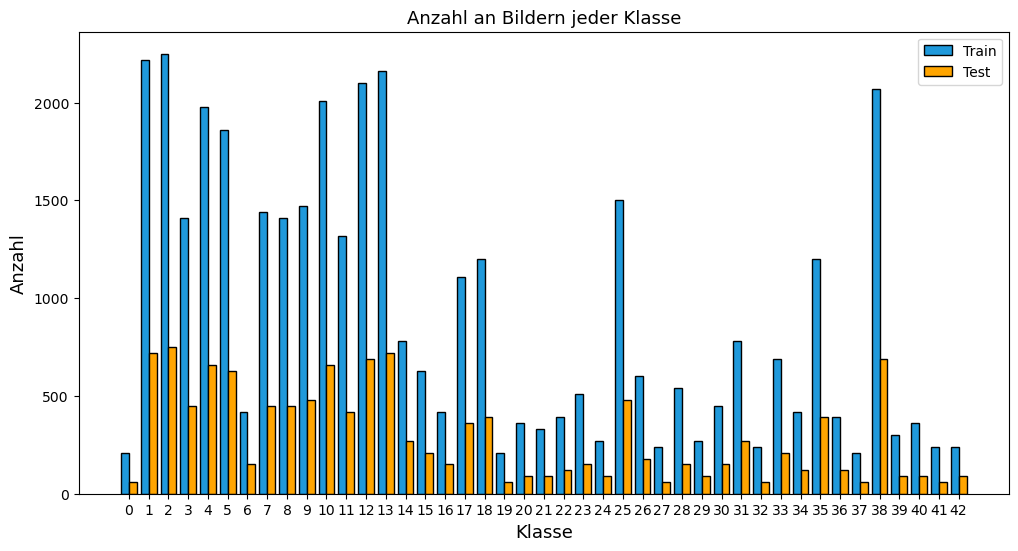

Anzahl für train: {0: 210, 1: 2220, 2: 2250, 3: 1410, 4: 1980, 5: 1860, 6: 420, 7: 1440, 8: 1410, 9: 1470, 10: 2010, 11: 1320, 12: 2100, 13: 2160, 14: 780, 15: 630, 16: 420, 17: 1110, 18: 1200, 19: 210, 20: 360, 21: 330, 22: 390, 23: 510, 24: 270, 25: 1500, 26: 600, 27: 240, 28: 540, 29: 270, 30: 450, 31: 780, 32: 240, 33: 689, 34: 420, 35: 1200, 36: 390, 37: 210, 38: 2070, 39: 300, 40: 360, 41: 240, 42: 240}

Anzahl für test: {0: 60, 1: 720, 2: 750, 3: 450, 4: 660, 5: 630, 6: 150, 7: 450, 8: 450, 9: 480, 10: 660, 11: 420, 12: 690, 13: 720, 14: 270, 15: 210, 16: 150, 17: 360, 18: 390, 19: 60, 20: 90, 21: 90, 22: 120, 23: 150, 24: 90, 25: 480, 26: 180, 27: 60, 28: 150, 29: 90, 30: 150, 31: 270, 32: 60, 33: 210, 34: 120, 35: 390, 36: 120, 37: 60, 38: 690, 39: 90, 40: 90, 41: 60, 42: 90}


In [16]:
# 2.
import matplotlib.pyplot as plt
unique_vals_train, freq_train = np.unique(trainY, return_counts=True)
trainYCounts = dict(zip(unique_vals_train, freq_train))

unique_vals_test, freq_test = np.unique(testY, return_counts=True)
testYCounts = dict(zip(unique_vals_test, freq_test))

fig= plt.subplots(figsize=(12, 6))
bar_width = 0.4
bar_pos1 = np.arange(len(unique_vals_train))
bar_pos2 = bar_pos1 + bar_width

plt.bar(bar_pos1, freq_train, color="#1F99DB", edgecolor="black", label="Train", width=bar_width)
plt.bar(bar_pos2, freq_test, color="orange", edgecolor="black", label="Test", width=bar_width)

plt.xlabel("Klasse", fontsize=13)
plt.ylabel("Anzahl", fontsize=13)
plt.title("Anzahl an Bildern jeder Klasse", fontsize=13)
plt.xticks(bar_pos1 + bar_width/2, unique_vals_train)
plt.legend()
plt.show()

print("Anzahl für train:", trainYCounts)
print("\nAnzahl für test:", testYCounts)

In [32]:
# 3. 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

trainY = to_categorical(trainY)
testY = to_categorical(testY)

## Definition der CNN Architektur
Schreiben Sie eine Funktion `generateCNN(width, height, depth, classes)` die eine Keras CNN-Architektur zurück gibt. Für die Definition der Architektur werden dieser Funktion die Parameter:

* `width`: Breite der Bilder
* `height`: Höhe der Bilder
* `depth`: Anzahl der Kanäle pro Bild
* `classes`: Anzahl der unterschiedlichen Klassen

übergeben. Die in der Funktion zu implementierende Architektur ist im folgenden Bild dargestellt. In der Spalte *Output shape* bezeichnen die zweite und dritte Zahl die Breite und die Höhe der einzelnen Kanäle (*Bilder*), der letzte Parameter bezeichnet die Anzahl der Kanäle (Parameter *filters* in der Konfiguration).
In der Übersichtstabelle ist die Filtergröße nicht aufgeführt. Empfohlen sind folgende Größen:
* für alle Pooling Layer: *pool_size=(2,2)*.
* für den ersten Conv2D-Layer: *kernel_size=(5,5)*.
* für alle weiteren Conv2D-Layer: *kernel_size=(3,3)*

**Anmerkung:** Der in der Tabelle mit *flatten_5* bezeichnete Layer ist nicht notwendig und erzeugt in bestimmten Keras-Versionen eine Fehlermeldung. Der Layer sollte nicht in die Architektur mit aufgenommen werden.


<img src="https://maucher.home.hdm-stuttgart.de/Pics/cnnTrafficSign.png" style="width:700px" align="middle">

In [18]:
from keras.models import Sequential
from keras import layers, activations

In [19]:
def generateCNN(width, height, depth, classes):
    model = Sequential(
    [
        layers.Conv2D(8, kernel_size=(5,5), padding="same", input_shape=(width, height, depth)),
        layers.Activation(activations.relu),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(3,3), padding="same"),
        layers.Activation(activations.relu),
        layers.BatchNormalization(),
        layers.Conv2D(16, kernel_size=(3,3), padding="same"),
        layers.Activation(activations.relu),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(32, kernel_size=(3,3), padding="same"),
        layers.Activation(activations.relu),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3,3), padding="same"),
        layers.Activation(activations.relu),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128),
        layers.Activation(activations.relu),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128),
        layers.Activation(activations.relu),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(classes),
        layers.Activation(activations.softmax)
    ])
    return model

## Training des CNN
Rufen Sie die im vorigen Abschnitt implementierte Funktion `generateCNN()` auf und weisen Sie die von der Funktion zurückgegebene Architektur der Variablen `model` zu. Durch Aufruf der Funktion `model.summary()` erhalten Sie eine Übersicht des erzeugten Netzes.

Für das Training soll der `Adam`-Algorithmus aus dem Modul `tensorflow.keras.optimizers` benutzt werden. `Adam` implementiert ein *Stochastic Gradient Descent*-Lernverfahren, welches die Lernraten für die Gewichte individuell und dynamisch anpasst.

In den folgenden zwei Codezellen, werden die Trainingsparameter konfiguriert:

In [20]:
model = generateCNN(32, 32, 3, 43)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         608       
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 8)         32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 16, 16, 16)        0

In [21]:
NUM_EPOCHS = 15 # Number of training epochs 
INIT_LR = 1e-3 # Initial Learning Rate for ADAM training
BS = 64 # Size of minibatches

In [22]:
from tensorflow.keras.optimizers.legacy import Adam

In [23]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5)) 
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Für das Training sollen nicht nur die vorhandenen Trainingsbilder eingesetzt werden, sondern zusätzlich Bilder die Augmentierungen der Trainingsbilder sind. Augmentierte Bilder können mit dem `ImageDataGenerator` des Moduls `tensorflow.keras.preprocessing.image` erzeugt werden. Der Code für die Erzeugung des in diesem Projekt eingesetzten Objekts ist unten gegeben. 

**Aufgabe:** Erklären Sie was in dieser Codezelle definiert wird.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

Das Training wird mit folgender Codezelle ausgeführt.

**Aufgabe:** Erklären Sie die Argumente der Funktion `fit_generator()`. 

Für die Ausführung der Zelle muss das Dictionary `classWeight` angelegt sein. Dieses enthält für jede Klasse den Klassenindex als key und den relativen Anteil dieser Klasse in den Trainingsbildern als Value. Wenn z.B. 30% aller Trainingsdaten zur Klasse 0 gehören, dann wäre der Value zum Key 0 der Wert 0.3.

In [26]:
num_of_train_images = len(trainX)

classWeight = {}
for key, val in trainYCounts.items():
    classWeight[key] = val/num_of_train_images

print(classWeight)

{0: 0.005355913183197735, 1: 0.05661965365094749, 2: 0.05738478410569002, 3: 0.03596113137289908, 4: 0.05049861001300722, 5: 0.04743808819403708, 6: 0.01071182636639547, 7: 0.03672626182764161, 8: 0.03596113137289908, 9: 0.03749139228238415, 10: 0.05126374046774975, 11: 0.03366574000867148, 12: 0.05355913183197735, 13: 0.05508939274146242, 14: 0.019893391823305875, 15: 0.016067739549593205, 16: 0.01071182636639547, 17: 0.028309826825473745, 18: 0.030605218189701345, 19: 0.005355913183197735, 20: 0.009181565456910403, 21: 0.00841643500216787, 22: 0.009946695911652937, 23: 0.01300721773062307, 24: 0.0068861740926828025, 25: 0.03825652273712668, 26: 0.015302609094850672, 27: 0.006121043637940269, 28: 0.013772348185365605, 29: 0.0068861740926828025, 30: 0.011476956821138005, 31: 0.019893391823305875, 32: 0.006121043637940269, 33: 0.017572496110586856, 34: 0.01071182636639547, 35: 0.030605218189701345, 36: 0.009946695911652937, 37: 0.005355913183197735, 38: 0.05279400137723482, 39: 0.007651

In [27]:
# compile the model and train the network
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // BS,
    epochs=NUM_EPOCHS,
    class_weight=classWeight,
    verbose=1)

[INFO] training network...


/var/folders/b1/1jg36gqj6kvcc4s94dqv3v0m0000gn/T/ipykernel_2565/880565928.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


Epoch 1/15
612/612 [==============================] - 61s 95ms/step - loss: 0.0819 - accuracy: 0.3087 - val_loss: 1.5067 - val_accuracy: 0.5272
Epoch 2/15
612/612 [==============================] - 57s 94ms/step - loss: 0.0393 - accuracy: 0.5335 - val_loss: 0.9853 - val_accuracy: 0.6875
Epoch 3/15
612/612 [==============================] - 52s 85ms/step - loss: 0.0264 - accuracy: 0.6507 - val_loss: 0.7529 - val_accuracy: 0.7528
Epoch 4/15
612/612 [==============================] - 53s 86ms/step - loss: 0.0189 - accuracy: 0.7213 - val_loss: 0.6579 - val_accuracy: 0.7834
Epoch 5/15
612/612 [==============================] - 54s 88ms/step - loss: 0.0146 - accuracy: 0.7699 - val_loss: 0.5731 - val_accuracy: 0.8190
Epoch 6/15
612/612 [==============================] - 53s 86ms/step - loss: 0.0122 - accuracy: 0.7998 - val_loss: 0.7196 - val_accuracy: 0.7862
Epoch 7/15
612/612 [==============================] - 53s 86ms/step - loss: 0.0104 - accuracy: 0.8296 - val_loss: 0.4240 - val_accuracy:

Visualisieren Sie die Entwicklung der *Accuracy* über dem Fortschritt der Trainingsepochen. Plotten Sie dabei die entsprechenden Kurven der Accuracy auf den Trainings- und auf den Testdaten in einen Graphen.

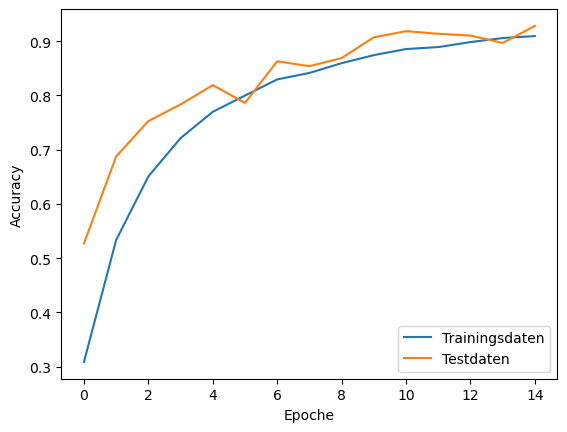

In [28]:
plt.plot(H.history["accuracy"], label="Trainingsdaten")
plt.plot(H.history["val_accuracy"], label="Testdaten")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

## Evaluation des gelernten Modells

Wenden Sie das gelernte CNN an, um für alle Bilder des Testdatensatzes die Art des Verkehrsschildes zu bestimmen. Evaluieren Sie die Qualität des CNN indem Sie einen `classification_report()` aus dem Modul `sklearn.metrics` erzeugen. 

1. Welche Metriken werden im Report angezeigt? Beschreiben Sie diese kurz?
2. Diskutieren Sie die Klassifikationsgenauigkeit des CNN anhand des Reports.

Zeigen Sie 5 Bilder an, die nicht korrekt klassifiziert wurden. Läßt sich die Fehlklassifikation erklären?

In [29]:
predicted_labels = np.argmax(model.predict(testX), axis=1)

from sklearn.metrics import classification_report

# Entweder testY mit tatsächlichen Klassenlabeln oder predicted_labels One-Hot-Encodieren

testY_NotOneHot = np.argmax(testY, axis=1)
#predicted_labels_OneHot = to_categorical(predicted_labels, 43)

report = classification_report(testY_NotOneHot, predicted_labels)
#report = classification_report(testY, predicted_labels_OneHot)

395/395 [==============================] - 4s 9ms/step


In [30]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.28      0.44        60
           1       0.92      0.99      0.96       720
           2       0.94      0.98      0.96       750
           3       0.95      0.93      0.94       450
           4       0.95      0.95      0.95       660
           5       0.93      0.96      0.95       630
           6       0.94      0.88      0.91       150
           7       0.95      0.95      0.95       450
           8       0.95      0.94      0.94       450
           9       0.95      0.96      0.96       480
          10       0.99      0.99      0.99       660
          11       0.81      0.93      0.86       420
          12       0.96      0.99      0.97       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.98      0.88      0.93       210
          16       1.00      0.91      0.95       150
          17       1.00    

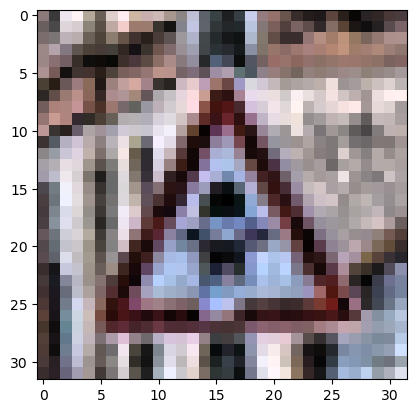

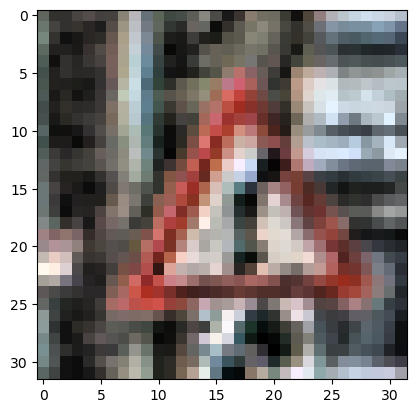

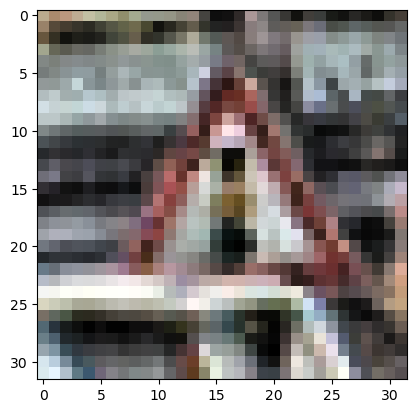

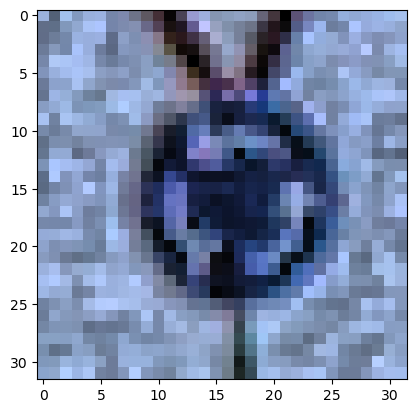

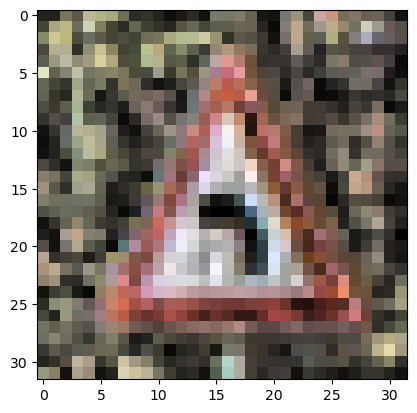

In [31]:
false_classified = np.where(predicted_labels != testY_NotOneHot)[0]
for i in range(0, 5):
    plt.imshow(testX[false_classified[i]])
    plt.show()

Das erste Bild ist von den Farben her sehr eintönig, was die Erkennung erschweren könnte.  
Ebenso beim zweiten Bild, der Hintergrund hat sehr viel schwarz, so wie das eigentlich entscheidende Merkmal auf dem Bild. 
Beim dritten Bild scheint unten im Bild etwas einen kleinen Teil des Schildes zu verdecken.
Beim vierten Bild hat wieder der Hintergrund die gleiche Farbe wie der entscheidende Teil des Schildes und ein Teil des Schildes ist abgeschnitten.
Das fünfte Bild hat etwas andere Farben als die meisten anderen Bilder, was die Erkennung auch erschweren könnte.